# Árboles de decisión
Como muchos algoritmos de machine-learning, los árboles de decisión pueden utilizarse tanto para problemas de clasificación como de regresión. Cuando implementamos los árboles para regresión, cada vez que se cree una nueva rama, el valor predicho para la variable dependiente será el promedio de las observaciones que caen dentro de la misma. Así, el criterio para separar será aquel que minimice el error entre los valores reales y el valor predicho.

### Carga de librerías


In [ ]:
# Librerias generales y montaje del drive
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

Módulos de scikit-learn para árboles de clasificación y métricas para evaluar nuestro modelo:

In [ ]:
# Modulos específicos para árboles de decisión
from sklearn.tree import DecisionTreeClassifier # Arboles de decisión para regresión
from sklearn.tree import plot_tree # Función para visualizar el árbol

# Módulos utiles para evaluar el modelo 
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
species = [data['target_names'][x] for x in data['target']]
df = pd.DataFrame(np.column_stack([data['data'], species]), columns=data['feature_names'] + ['species'])

In [ ]:
print('Dimensión del dataset: {}'.format(df.shape))
# Inspección de los primeros datos
df.head(3)

Dimensión del dataset: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Construcción del módelo: árbol de decisión


### Preprocesamiento: selección de features y separación en entrenamiento y testeo

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [ ]:
labels, counts = np.unique(df['species'], return_counts=True) # Función que devuelve las etiquetas y las frecuencias

print('Etiquetas {}'.format(labels))
print('Frecuencias {}'.format(counts))

Etiquetas ['setosa' 'versicolor' 'virginica']
Frecuencias [50 50 50]


Separamos nuestros datos en train y test. Utilizaremos una partición del 80% y 20% respectivamente

In [ ]:
random_seed = 7
# Lista de features que vamos a considerar 
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Variable a predecir
target = 'species'

# Construcción de la matriz de features
X = df[features].to_numpy()

# Construcción del vector a predecir
y = df[target].to_numpy()

# Creacion de las matrices de entrenamiento y testeo. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (120, 4)
Dimensión de la matriz de features para testeo: (30, 4)


### [Creación y ajuste del modelo](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree%20regressor)

Aquí creamos efectivamente el árbol de clasificación. Vamos a comenzar creando un árbol de profundidad igual a 2 y luego vamos a ir jugando con los distintos parámetros.

Como todos los modelos en *scikit-learn* hay una línea que se refiere a la construción del modelo, otra al entrenamiento, y luego podemos predecir o ver la performance del modelo. 

In [ ]:
# Entrenamiento del modelo con el método fit
# Entrenamiento del modelo
arbol = DecisionTreeClassifier(max_leaf_nodes = 5)
arbol.fit(X_train, y_train)

# Score del modelo en el conjunto de entrenamiento 
score_in_train = arbol.score(X_train, y_train)

# Score del modelo en el conjunto de testeo
score_in_test = arbol.score(X_test, y_test)

print('Score en el set de entrenamiento: {}'.format(score_in_train))
print('Score en el set de testeo: {}'.format(score_in_test))

Score en el set de entrenamiento: 1.0
Score en el set de testeo: 0.9


In [ ]:
# Score del modelo en los datos de entrenamiento (siempre esperamos que aquí sea alto)
score_in_train = arbol.score(X_train, y_train)

print('Score en el set de entrenamiento: {}'.format(score_in_train))

Score en el set de entrenamiento: 1.0


In [ ]:
# Score del modelo en los datos de testeo 
# (acá puede fluctuar pero en general es bajo respecto a los datos de entrenamiento)
score_in_test = arbol.score(X_test, y_test)

print('Score en el set de testeo: {}'.format(score_in_test))

Score en el set de testeo: 0.9


#### Visualización del árbol

Aquí vamos a visualizar el árbol. Para árboles chicos está bueno, para árboles grandes hay que ajustar bien los tamaños de las figuras.

[Text(334.8, 391.392, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [43, 38, 39]'),
 Text(167.4, 304.416, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(502.20000000000005, 304.416, 'petal width (cm) <= 1.7\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(334.8, 217.44, 'petal length (cm) <= 5.0\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(167.4, 130.464, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(502.20000000000005, 130.464, 'sepal length (cm) <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(334.8, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(669.6, 217.44, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

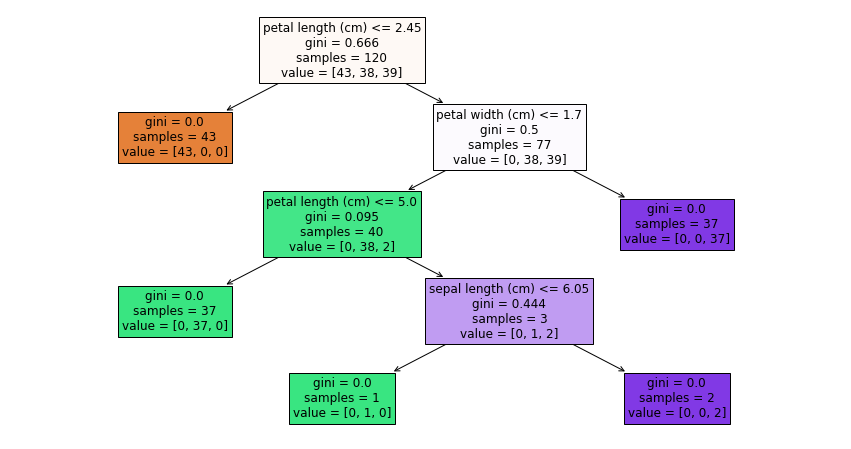

In [ ]:
# Creamos la figura donde plotear el árbol con matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# Llamamos a la función "plot_tree" que importamos de sklearn.tree más arriba.
# Le pasamos como argumento el modelo que creamos y el nombre de los features.
# "fontsize" y "filled" son solo ajustes de la visualización 
# y le decimos que plotee el arbol en la figura que creamos
plot_tree(arbol, feature_names=features, fontsize = 12, filled = True, ax = ax)

**¿Cómo interpretamos este gráfico?**

- El árbol se lee de arriba hacia abajo. 
- Cada nodo representa una pregunta que se responde con **verdadero** y **falso**: si es verdadero tomamos la rama de la izquierda; si es falso, la de la derecha.
- La pregunta está marcada por la primer línea en cada bloque. 


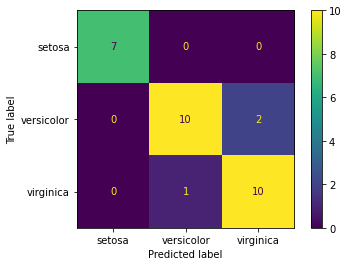

In [ ]:
plot_confusion_matrix(arbol, X_test, y_test)  
plt.show()

In [ ]:
# Este atributo tiene una medida de la importancia de cada feature
feature_importance = arbol.feature_importances_ 

print('Features: {}'.format(features))
print('Importancia = {}'.format(feature_importance))

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Importancia = [0.        0.        0.0314025 0.9685975]


C:\ProgramData\Anaconda3\envs\coder_house\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


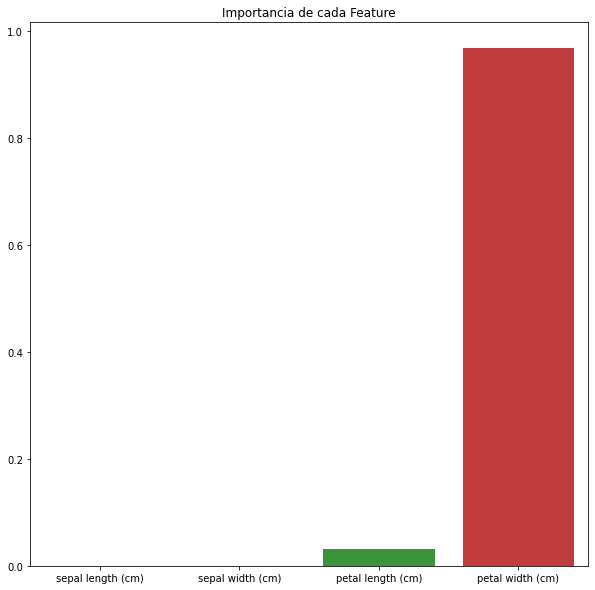

In [ ]:
#Importancia de las variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
importances = arbol.feature_importances_
sns.barplot(features, importances)
plt.title('Importancia de cada Feature')
plt.show()